Data loading...
Data loaded successfully...!
Mean and covariance for digit 7:
Mean is:
 [44.21682791 71.84486403]
Covariance is:
 [[ 938.96349719 1283.11415127]
 [1283.11415127 1861.39186598]]

Mean and covariance for digit 8:
Mean is:
 [19.37965385 52.91724037]
Covariance is:
 [[157.19009238 385.02166893]
 [385.02166893 962.84357906]]


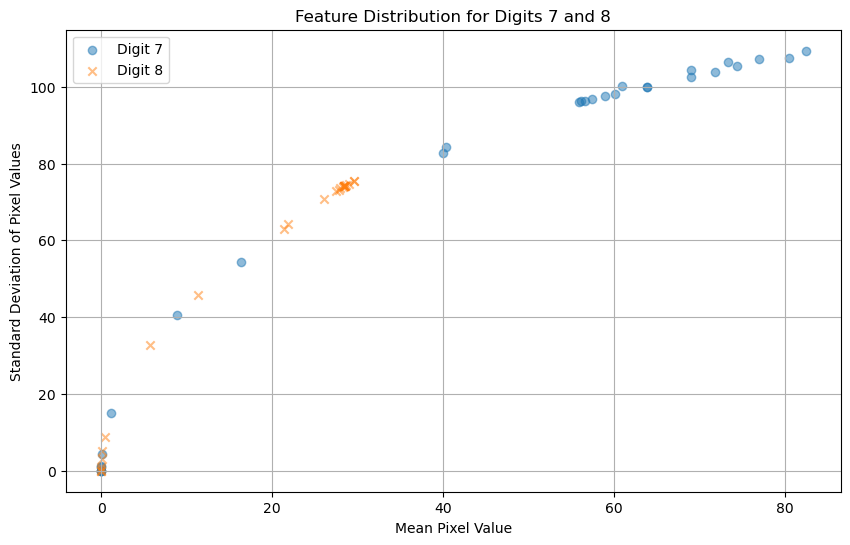


Classification accuracy is: 82.14%

Sample predictions:
True labels are:      [7 7 7 7 7 7 7 7 7 7]
Predicted labels are: [8 8 8 8 8 7 7 7 7 7]


In [9]:
import scipy.io as si
import numpy as n_py
import matplotlib.pyplot as m_plt
from scipy.stats import multivariate_normal

# Loading the datasets of test and train pixels of .mat extension

print("Data loading...")

Train_data_7 = si.loadmat('Datasets/train_0_img.mat')['target_img']
Train_data_8 = si.loadmat('Datasets/train_1_img.mat')['target_img']
Test_data_7 = si.loadmat('Datasets/test_0_img.mat')['target_img']
Test_data_8 = si.loadmat('Datasets/test_1_img.mat')['target_img']

print("Data loaded successfully...!")

#extracting features like mean and standard deviation
def ExtractingFeatures(pixels):
    average_pixel_vals = n_py.mean(pixels, axis=(1, 2))
    std_pixel_vals = n_py.std(pixels, axis=(1, 2))
    features = n_py.column_stack((average_pixel_vals, std_pixel_vals))
    return features

# Extracting properties for training data of given dataset

Train_data_7_features = ExtractingFeatures(Train_data_7)
Train_data_8_features = ExtractingFeatures(Train_data_8)

# Extracting properties for testing data of given dataset
Test_data_7_features = ExtractingFeatures(Test_data_7)
Test_data_8_features = ExtractingFeatures(Test_data_8)

def EstimateParameters(features):
    mean = n_py.mean(features, axis=0)
    covariance = n_py.cov(features, rowvar=False)
    return mean, covariance

# Estimate parameters for digit 7 and 8
mean_of_7, cov_of_7 = EstimateParameters(Train_data_7_features)
mean_of_8, cov_of_8 = EstimateParameters(Train_data_8_features)

# Printing  mean and covariance (standard deviation)
print("Mean and covariance for digit 7:")
print("Mean is:\n", mean_of_7)
print("Covariance is:\n", cov_of_7)

print("\nMean and covariance for digit 8:")
print("Mean is:\n", mean_of_8)
print("Covariance is:\n", cov_of_8)

# Ploting graph for feature distributions
m_plt.figure(figsize=(10, 6))
m_plt.scatter(Train_data_7_features[:, 0], Train_data_7_features[:, 1], label='Digit 7', alpha=0.5, marker='o')
m_plt.scatter(Train_data_8_features[:, 0], Train_data_8_features[:, 1], label='Digit 8', alpha=0.5, marker='x')
m_plt.xlabel('Mean Pixel Value')
m_plt.ylabel('Standard Deviation of Pixel Values')
m_plt.legend()
m_plt.title('Feature Distribution for Digits 7 and 8')
m_plt.grid(True)
m_plt.show()

def NaiveBayesClassifier(test_features, mean_of_7, cov_of_7, mean_of_8, cov_of_8):
    p_7 = multivariate_normal.pdf(test_features, mean_of_7, cov_of_7)
    p_8 = multivariate_normal.pdf(test_features, mean_of_8, cov_of_8)
    return n_py.where(p_7 > p_8, 7, 8)

# Prepare the testing set
test_features = n_py.vstack((Test_data_7_features, Test_data_8_features))
true_labels = n_py.hstack((n_py.full(Test_data_7_features.shape[0], 7), n_py.full(Test_data_8_features.shape[0], 8)))

# Classifying the test set
predicted_labels = NaiveBayesClassifier(test_features, mean_of_7, cov_of_7, mean_of_8, cov_of_8)

# Computing and printing the classification accuracy
def ComputeAccuracy(true_labels, predicted_labels):
    accuracy = n_py.mean(true_labels == predicted_labels)
    return accuracy

accuracy = ComputeAccuracy(true_labels, predicted_labels) * 100
print(f"\nClassification accuracy is: {accuracy:.2f}%")

# Print some predictions for verification
print("\nSample predictions:")
print("True labels are:     ", true_labels[:10])
print("Predicted labels are:", predicted_labels[:10])
